In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [34]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


In [12]:
X=np.array([
    [0,0],[0,1],[1,0],[1,1]
])

y=np.array([[0],[1],[1],[0]])

In [16]:
input_size=X.shape[1]
hidden_size=2
output_size=1

W1=np.random.randn(input_size, hidden_size)*0.01
b1=np.zeros((1, hidden_size))

W2=np.random.randn(hidden_size,output_size)*0.01
b2 = np.zeros((1, output_size))

In [31]:
z1 = np.dot(X, W1) + b1

a1 = sigmoid(z1)

z2 = np.dot(a1, W2) + b2

y_hat = sigmoid(z2)

In [36]:
error_output = y_hat - y
delta_output = error_output * sigmoid_derivative(z2)
error_hidden = np.dot(delta_output, W2.T)
error_hidden = np.dot(delta_output, W2.T)
delta_hidden = error_hidden * sigmoid_derivative(z1)


In [37]:
learning_rate = 0.1
W2 -= learning_rate * np.dot(a1.T, delta_output)
b2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)
W1 -= learning_rate * np.dot(X.T, delta_hidden)
b1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)


In [38]:
epochs = 1000
losses = []

for epoch in range(epochs):

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y_hat - y) ** 2)
    losses.append(loss)

    error_output = y_hat - y
    delta_output = error_output * sigmoid_derivative(z2)

    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(z1)

    W2 -= learning_rate * np.dot(a1.T, delta_output)
    b2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)

    W1 -= learning_rate * np.dot(X.T, delta_hidden)
    b1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)


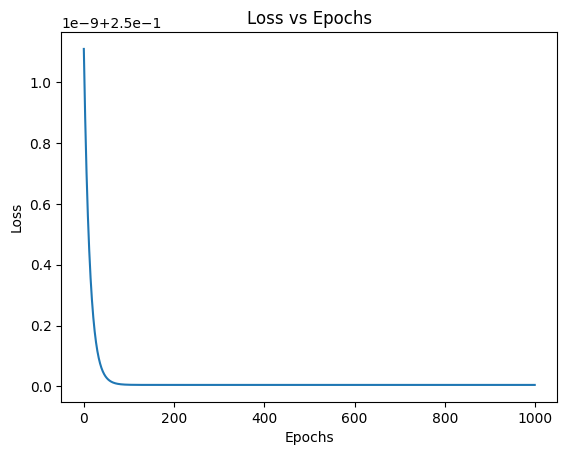

In [39]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()


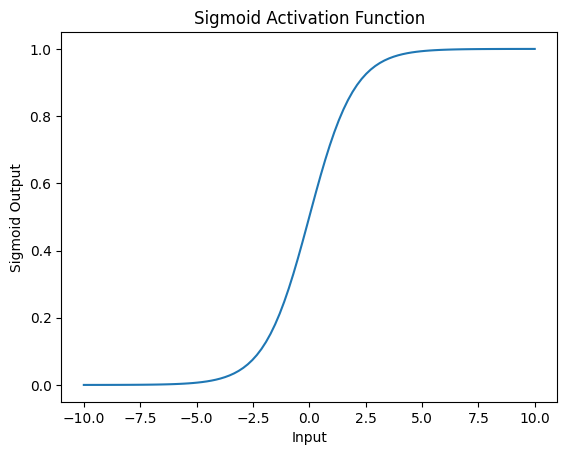

In [40]:
x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel("Input")
plt.ylabel("Sigmoid Output")
plt.title("Sigmoid Activation Function")
plt.show()


In [41]:
test_input = np.array([[1, 0]])

z1_test = np.dot(test_input, W1) + b1
a1_test = sigmoid(z1_test)

z2_test = np.dot(a1_test, W2) + b2
prediction = sigmoid(z2_test)

print("Predicted Output:", prediction)


Predicted Output: [[0.49999742]]
